## ***CAD Interest Rate Analysis in London International Banking Offerd Rate (LIBOR)***  (2001- 2010)


## MEAN, SD AND YEILD RETURNS FOR CAD LIBOR 


In [4]:
library(quantmod)
library(fitdistrplus)
library(corrplot)
library(ggplot2)
library(data.table)
library(caTools)
library(xts)
library(zoo)
library(ggcorrplot)
options(warn=-1)

### Load LIBOR data:- For all maturities / tenors

In [6]:
# selected tenors for 1month, 3months, 6months, 9 months and 12 months
CAD = c("CAD1MTD156N","CAD3MTD156N","CAD6MTD156N","CAD9MTD156N","CAD12MD156N")
loadSymbols(CAD, src='FRED')
IMPORTcad= as.numeric(na.omit(CAD))
CADLibor= cbind(CAD1MTD156N,CAD3MTD156N,CAD6MTD156N,CAD9MTD156N,CAD12MD156N)

[1] "CAD1MTD156N" "CAD3MTD156N" "CAD6MTD156N" "CAD9MTD156N" "CAD12MD156N"

In [7]:
# loading for USD for 1month, 3months, 6months, 9 months and 12 months
USD = c("USD1MTD156N","USD3MTD156N","USD6MTD156N","USD9MTD156N","USD12MD156N")
loadSymbols(USD, src='FRED')
IMPORTcad= as.numeric(na.omit(USD))
USDLibor= cbind(USD1MTD156N,USD3MTD156N,USD6MTD156N,USD9MTD156N,USD12MD156N)

[1] "USD1MTD156N" "USD3MTD156N" "USD6MTD156N" "USD9MTD156N" "USD12MD156N"

#### Major global recesion happened during 2002 and 2008 period, and the mean of the decads could be generally seen by using Changepoint packages

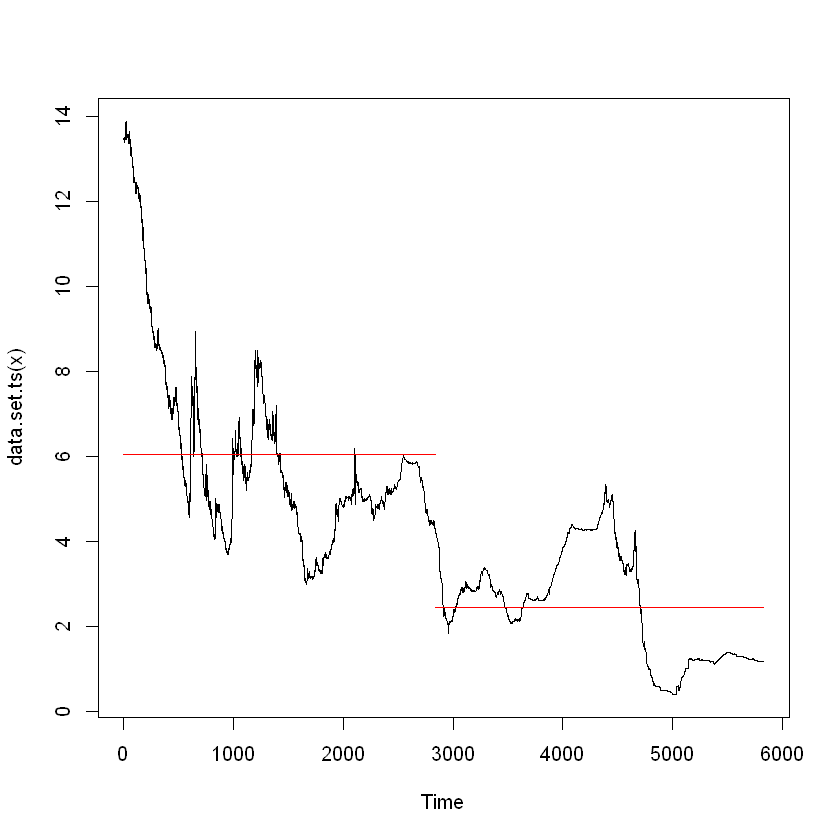

In [9]:
library(changepoint)
dataout= CADLibor$CAD3MTD156N[!is.na(CADLibor$CAD3MTD156N),]
out=cpt.mean(as.numeric(dataout),penalty="MBIC",pen.value=0,method="AMOC",Q=5,test.stat="Normal",class=TRUE,param.estimates=TRUE,minseglen=1)
plot(out,diagnostic=TRUE)

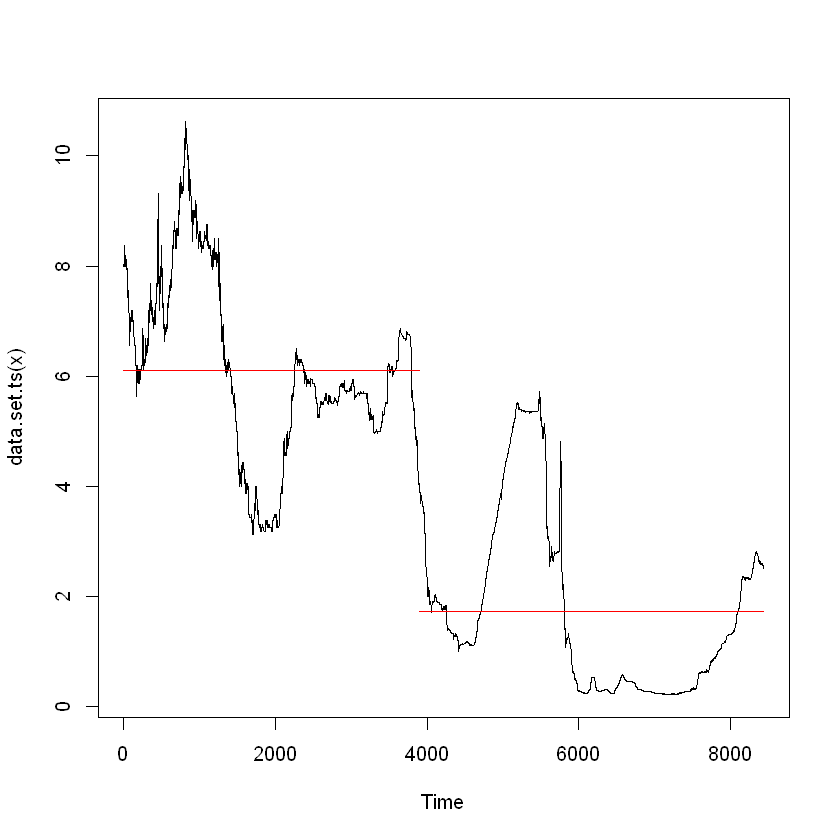

In [30]:
dataout1= USDLibor$USD3MTD156N[!is.na(USDLibor$USD3MTD156N),]
out=cpt.mean(as.numeric(dataout1),penalty="MBIC",pen.value=0,method="AMOC",Q=5,test.stat="Normal",class=TRUE,param.estimates=TRUE,minseglen=1)
plot(out,diagnostic=TRUE)

## Here I used the log return definition to get both daily, weekly and monthly yeild returns


In [10]:
# daily, weekly and 25 days return using the log-return definition 
CAD1diff= diff(log(CADLibor), lag=1)
CAD5diff=diff(log(CADLibor),lag=5)
CAD25diff=diff(log(CADLibor), lag=25)

In [11]:
# daily, weekly and 25 days return using the log-return definition 
USD1diff= diff(log(USDLibor), lag=1)
USD5diff=diff(log(USDLibor),lag=5)
USD25diff=diff(log(USDLibor), lag=25)

### Selecting duration form 2001-2010

In [12]:
# windows for period from 2001-2010 (incorporate both 2002 recesión)
CAD1day= window(CAD1diff, start=as.Date("2001-01-01"), end=as.Date("2010-12-31"))
CAD5day= window(CAD5diff, start=as.Date("2001-01-01"), end=as.Date("2010-12-31"))
CAD25day= window(CAD25diff, start=as.Date("2001-01-01"), end=as.Date("2010-12-31"))

In [13]:
# windows for period from 2001-2010 (incorporate both 2002 recesión)
USD1day= window(USD1diff, start=as.Date("2001-01-01"), end=as.Date("2010-12-31"))
USD5day= window(USD5diff, start=as.Date("2001-01-01"), end=as.Date("2010-12-31"))
USD25day= window(USD25diff, start=as.Date("2001-01-01"), end=as.Date("2010-12-31"))

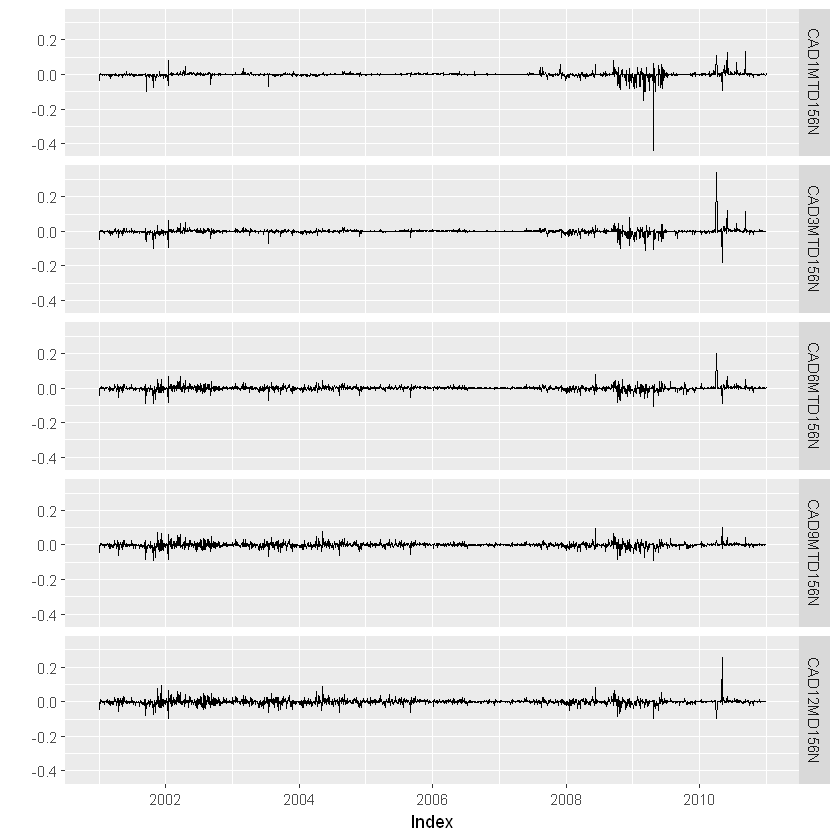

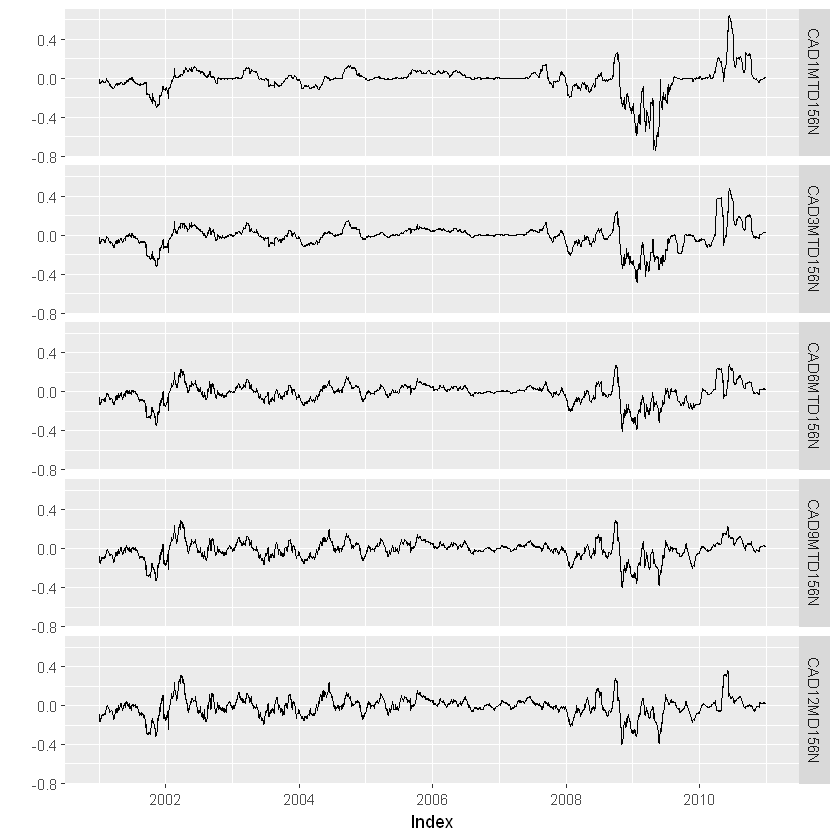

In [15]:
#Autoplot of 
autoplot(CAD1day)
autoplot(CAD25day)

### Mean and Standard Deviation 

In [16]:
yieldchanges.period1=CAD1day
# Means and St Deviations of the yield changes
yieldchanges.mean=apply(yieldchanges.period1,2,mean)
yieldchanges.vol=sqrt(apply(yieldchanges.period1,2,var))
df.yield= round (data.frame(daily.mean=yieldchanges.mean,daily.vol=yieldchanges.vol), digits=4)
print(df.yield)

            daily.mean daily.vol
CAD1MTD156N     -7e-04    0.0153
CAD3MTD156N     -6e-04    0.0135
CAD6MTD156N     -5e-04    0.0125
CAD9MTD156N     -5e-04    0.0129
CAD12MD156N     -4e-04    0.0142


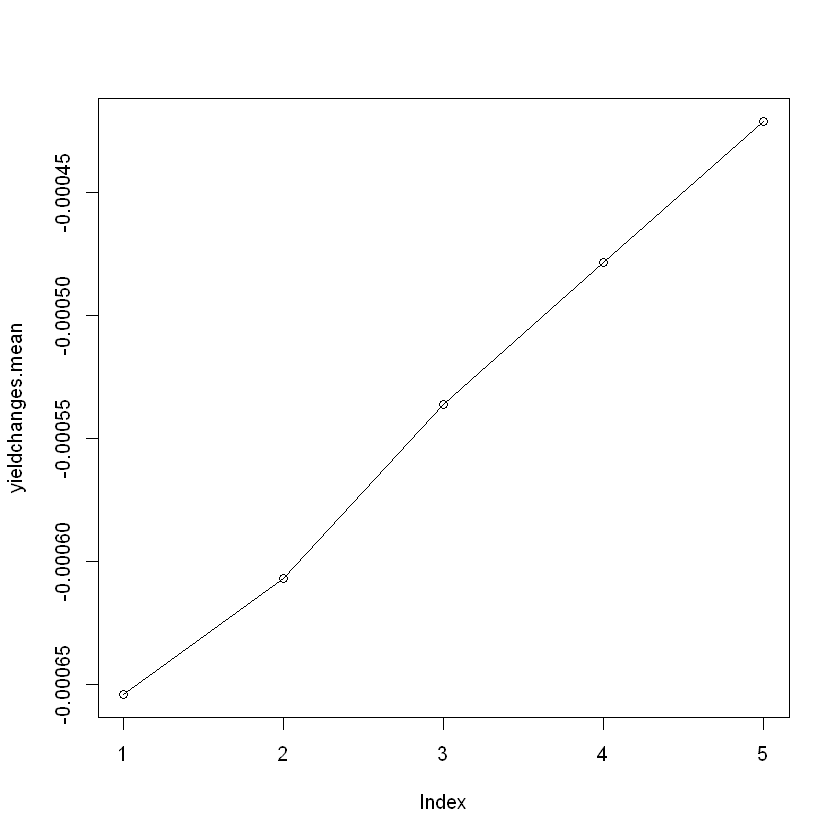

In [20]:
plot(yieldchanges.mean)
lines(yieldchanges.mean)

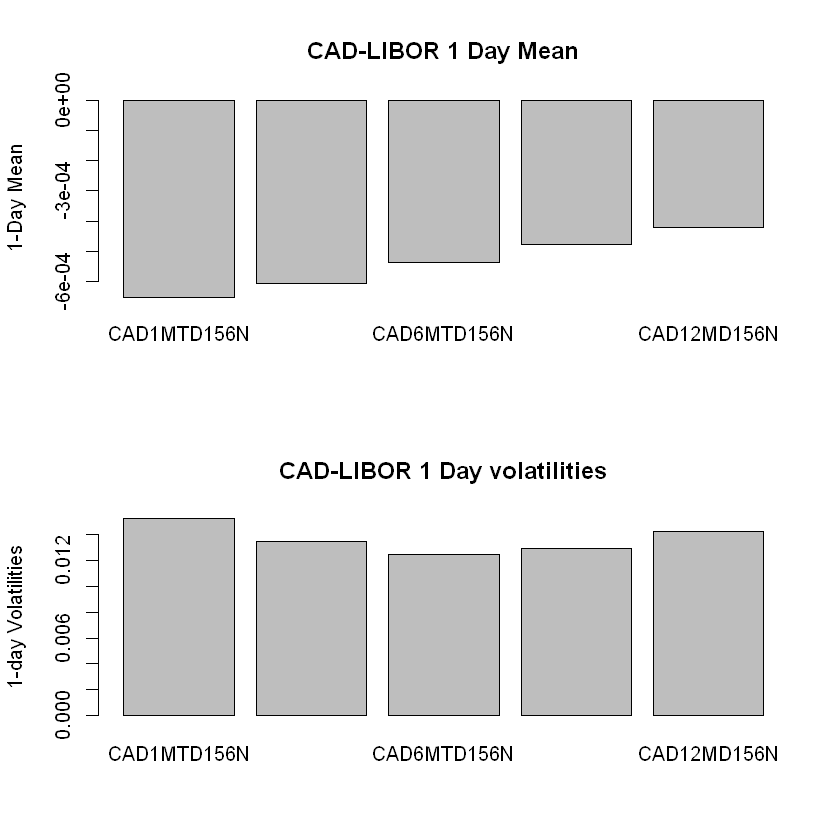

In [22]:
# Daily yield
par(mfcol=c(2,1))
barplot(yieldchanges.mean,main=paste("CAD-LIBOR 1 Day Mean",sep="\n"),ylab="1-Day Mean")
barplot(yieldchanges.vol,main=paste("CAD-LIBOR 1 Day volatilities",sep="\n"),ylab="1-day Volatilities")


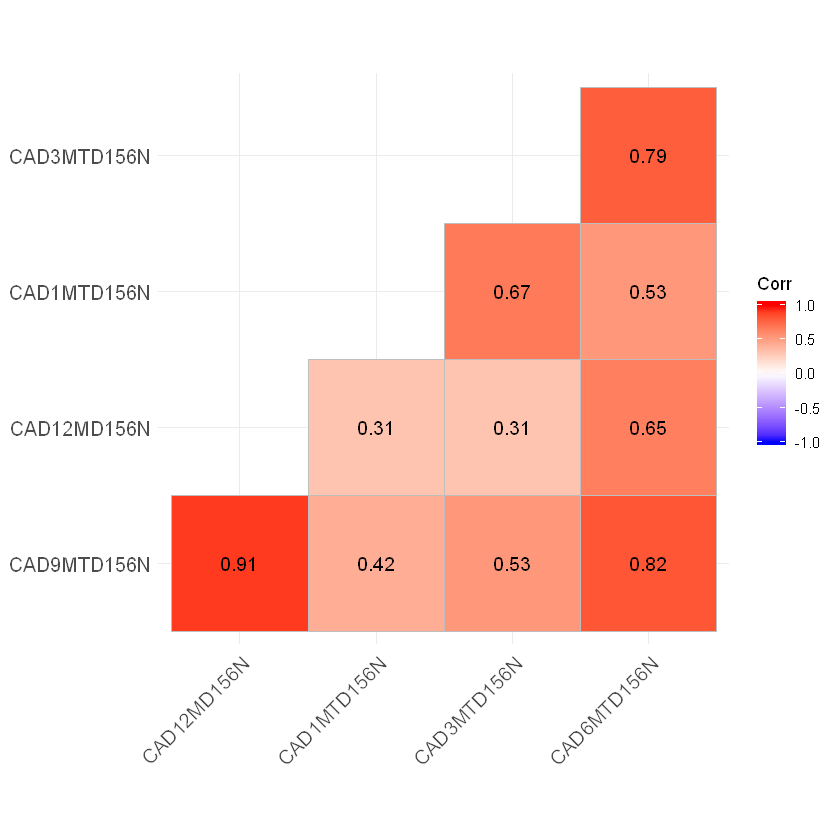

In [23]:
yieldchanges.cor= cor(CAD1day)
ggcorrplot(yieldchanges.cor, hc.order = TRUE, type = "lower", lab = TRUE)

### Yield changes for 25 days

#### When tenors maturity close  the correlations get stronger

In [24]:
yieldchanges.period2<-CAD25day
# Means and St Deviations of the yield changes
yieldchanges2.mean<-apply(yieldchanges.period2,2,mean)
yieldchanges2.vol<-sqrt(apply(yieldchanges.period2,2,var))
print( round (data.frame(Increment25.mean=yieldchanges2.mean,Increment25.vol=yieldchanges2.vol), digits=4))

            Increment25.mean Increment25.vol
CAD1MTD156N          -0.0164          0.1357
CAD3MTD156N          -0.0153          0.1130
CAD6MTD156N          -0.0137          0.0961
CAD9MTD156N          -0.0124          0.0939
CAD12MD156N          -0.0110          0.0970


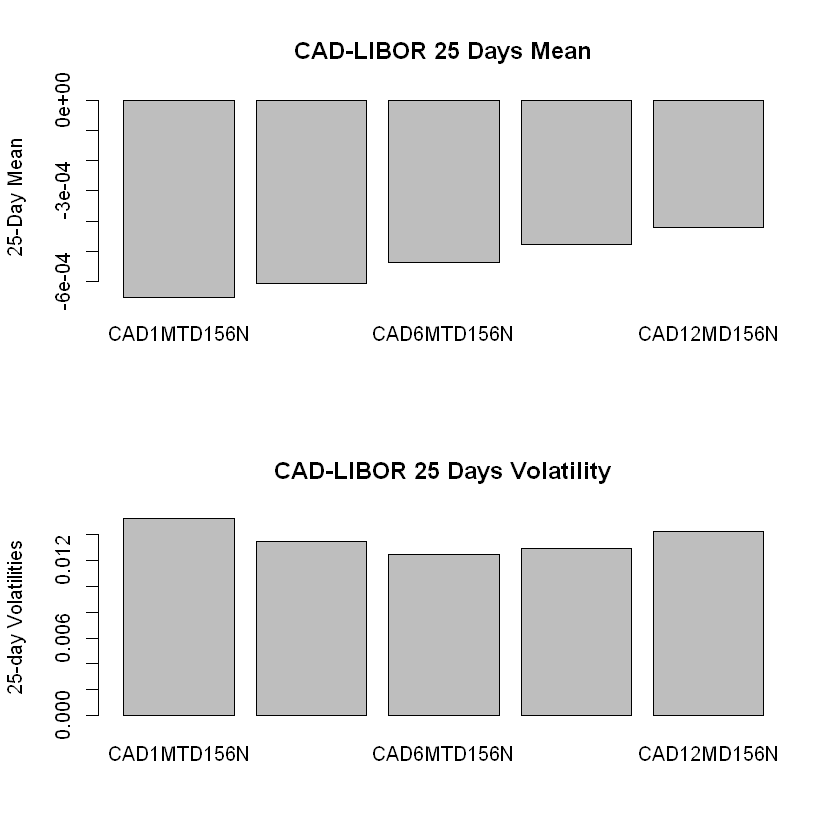

In [26]:
par(mfcol=c(2,1))
barplot(yieldchanges.mean,main=paste("CAD-LIBOR 25 Days Mean",sep="\n"),ylab="25-Day Mean")
barplot(yieldchanges.vol,main=paste("CAD-LIBOR 25 Days Volatility",sep="\n"),ylab="25-day Volatilities")


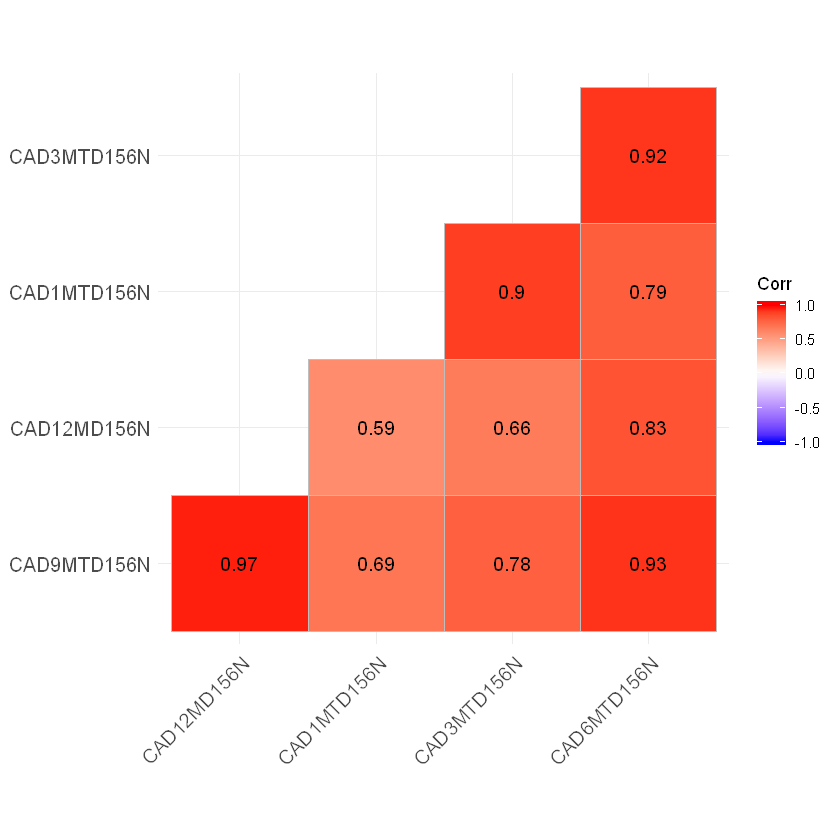

In [28]:
yieldchanges.cor2= cor(CAD25day)
ggcorrplot(yieldchanges.cor2, hc.order = TRUE, type = "lower", lab = TRUE)

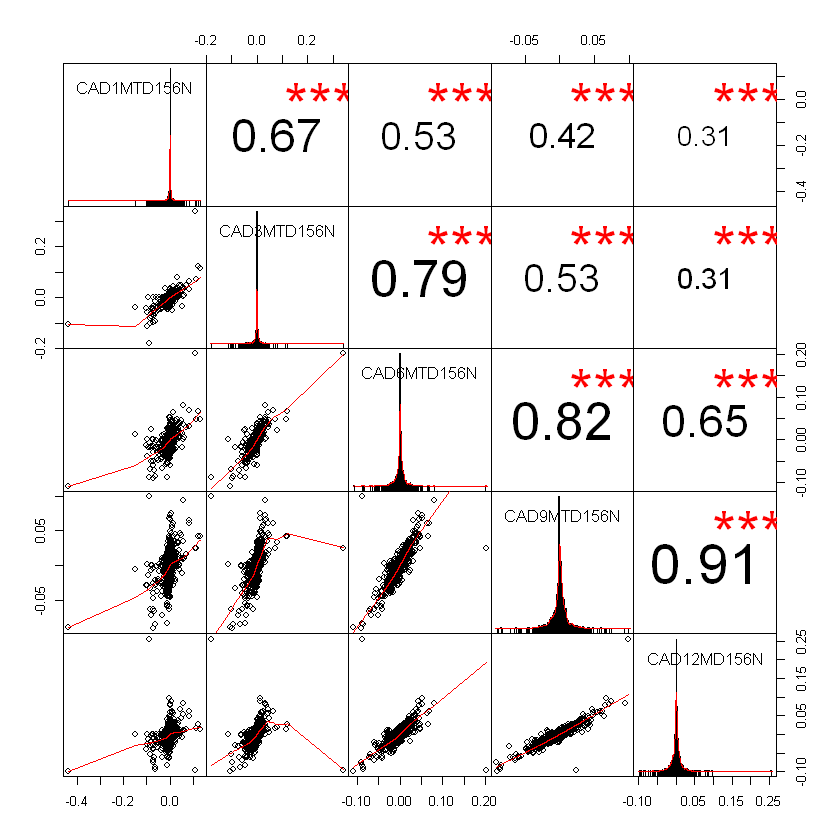

In [30]:
library("PerformanceAnalytics")
my_data <- CAD1day[, c(1,2,3,4,5)]
chart.Correlation(my_data, histogram=TRUE, pch=19)

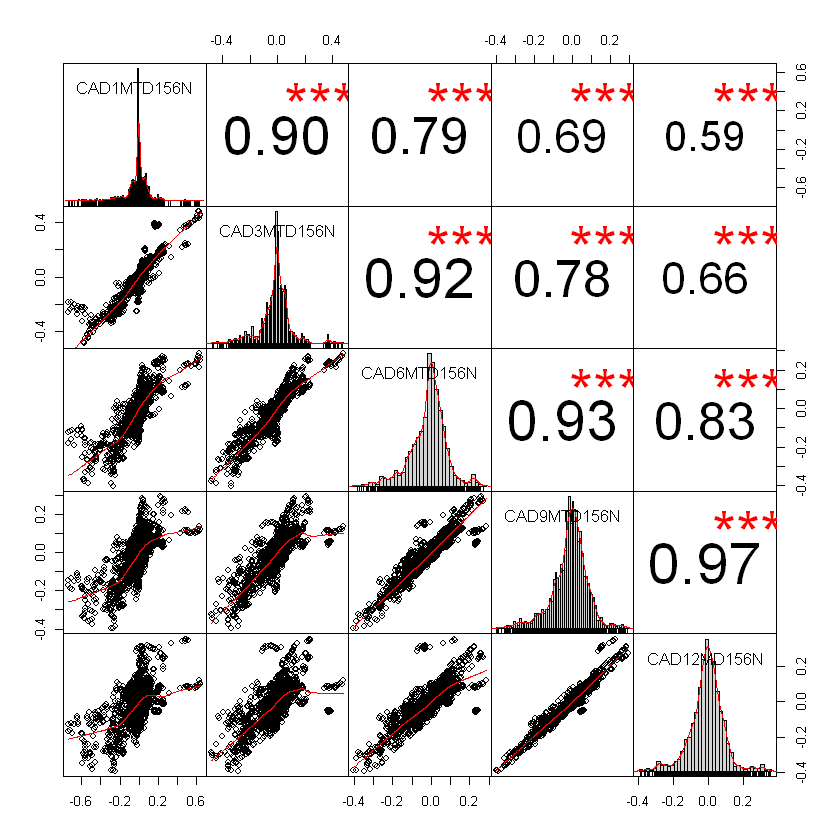

In [73]:
my_data25 <- CAD25day[, c(1,2,3,4,5)]
chart.Correlation(my_data25, histogram=TRUE, pch=19)